# Title : Customer Segmentation (K-Means) | Analysis

#### Problem Statement
- Find different categories for the customers and give suggestion for improving revenue.

# Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

### Dataset Description
##### Dataset contains this Features:
-      Age
-      Gender
-      Anuual Income in dollars
-      Spending Score from 1 to 100

In [12]:
data = pd.read_csv('Mall_Customers.csv')

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
data = data.iloc[:,1:]

In [17]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# EDA

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [23]:
def plot_kde():

    columns = data.columns[1:]
    for column in columns:
        sns.kdeplot(data[column] , label = column , fill= True)
        plt.legend()

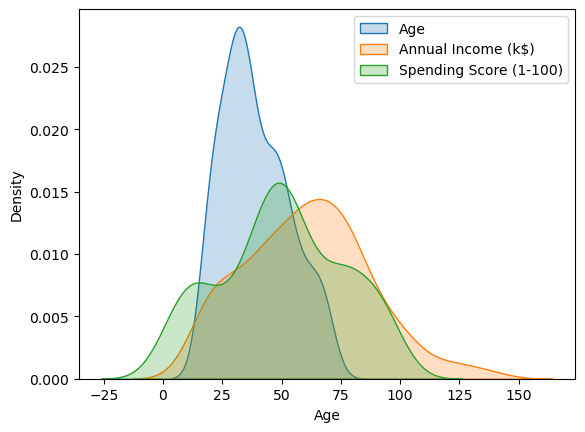

In [24]:
plot_kde()

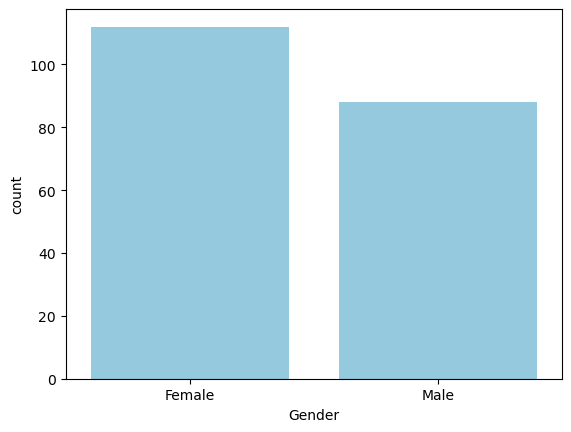

In [44]:
sns.barplot(data['Gender'].value_counts() , color='skyblue')
plt.show()

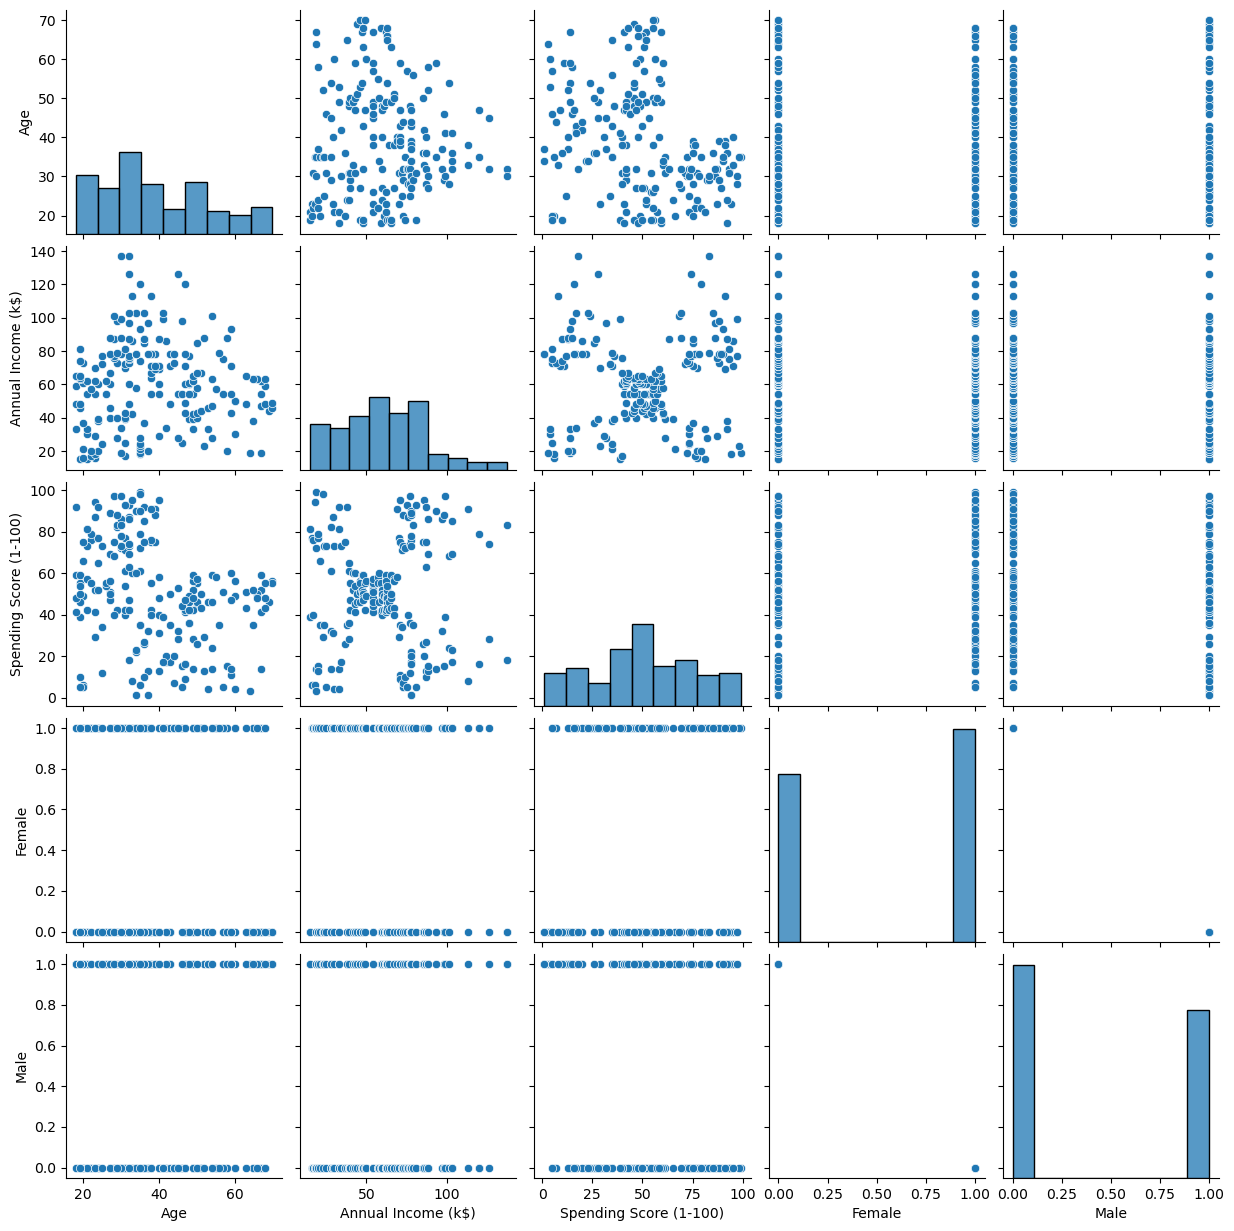

In [122]:
sns.pairplot(data.select_dtypes('int'))
plt.show()

# Data Preprocessing

In [59]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(data[['Gender']]).toarray().astype('int')

In [60]:
df = pd.DataFrame(
    encoded,
    columns=["Female" , "Male"],
    index = data.index
)

In [65]:
data = pd.concat([data , df] , axis=1).drop(columns = 'Gender')

In [111]:
pca = PCA(n_components=2)
trf_df = pd.DataFrame(
    pca.fit_transform(data),
    columns=['Com1' , 'Com2'],
    index = data.index
)

# Model Training

## Find the Optimal Value of K 

### Elbow Method

In [173]:
def elbow_method():
    frame = pd.DataFrame(columns=['Clusters' , 'WCSS'])
    for cluster in range(1 , 11):
        km = KMeans(n_clusters=cluster)
        km.fit(trf_df)
        wcss = pd.DataFrame({'Clusters' : [cluster] , 'WCSS' : [km.inertia_]} , index = [0])
        frame = pd.concat([frame , wcss] , axis = 0)

    plt.plot(frame['Clusters'] , frame['WCSS'] , color = 'red' , label = 'Inertia' , marker = 'o')
    plt.xlabel("Clusters")
    plt.ylabel("Inertia")
    plt.legend()
    plt.xlim(1,10)
    plt.title("Elbow Method Curve")
    plt.show()

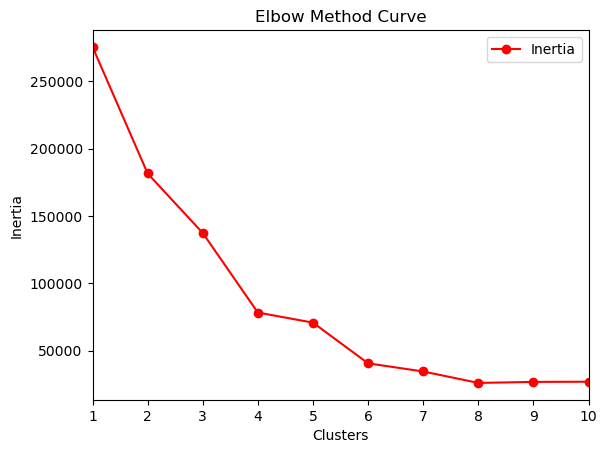

In [174]:
elbow_method()

### Silhouette Score

In [126]:
def Optimal_K():

    scores = []
    for cluster in range(2,11):
        km = KMeans(n_clusters=cluster)
        km.fit(trf_df)
        score = silhouette_score(trf_df , km.predict(trf_df))
        print(f"cluster : {cluster} --> Silhouette Score : {score}")
        scores.append(score)

    scores = np.array(scores)

    print(f"The Optimal Value of K = {np.argmax(scores)} and Silhouette Score : {np.max(scores)}")

In [127]:
Optimal_K()

cluster : 2 --> Silhouette Score : 0.32024312084150014
cluster : 3 --> Silhouette Score : 0.4510540720584143
cluster : 4 --> Silhouette Score : 0.4764399855186501
cluster : 5 --> Silhouette Score : 0.4349831033418313
cluster : 6 --> Silhouette Score : 0.44483554201078407
cluster : 7 --> Silhouette Score : 0.521220607422854
cluster : 8 --> Silhouette Score : 0.45418345176132646
cluster : 9 --> Silhouette Score : 0.43343330179069234
cluster : 10 --> Silhouette Score : 0.4497073985224037
The Optimal Value of K = 5 and Silhouette Score : 0.521220607422854


## Silhoutte Score = 0.52
#### The Higher Silhoutte Score indicate good quality of clustering.
#### The Max Silhoutte Score 0.52 get on the K = 5 Clusters.

## Train model on Optimal Value of K

In [114]:
km = KMeans(n_clusters=5)
km.fit(trf_df)

KMeans(n_clusters=5)

In [115]:
pre_clu = km.predict(trf_df)

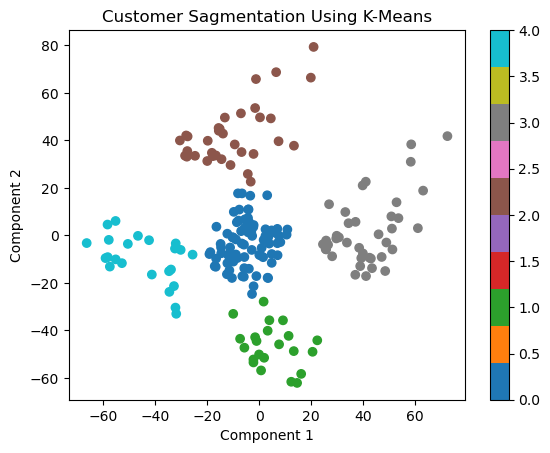

In [170]:
plt.scatter(trf_df['Com1'] , trf_df['Com2'] , c = pre_clu , cmap = 'tab10')
plt.title("Customer Sagmentation Using K-Means")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

In [128]:
data['cluster'] = km.predict(trf_df)

In [130]:
clusters = data.groupby('cluster')

# Business Insights

## Cluster A

In [151]:
cluster_A = clusters.get_group(0)

# minimum and maximum age for cluster A
min_age_A = cluster_A['Age'].min()
max_age_A = cluster_A['Age'].max()

# Average Income for Cluster A
avg_income_A = cluster_A['Annual Income (k$)'].median()

# Average Spending for Cluster A
avg_spending_A = cluster_A['Spending Score (1-100)'].median()

print(f"Age : {min_age_A} - {max_age_A}")
print(f"Income : {avg_income_A}$")
print(f"Spending Score : {avg_spending_A}")

Age : 18 - 70
Income : 55.5$
Spending Score : 49.5


### Cluster A Insights

In [161]:
print(f"Age : {min_age_A} - {max_age_A}")
print(f"Avg Income : {avg_income_A}$")
print(f"Avg Spending Score : {avg_spending_A}")

Age : 18 - 70
Avg Income : 55.5$
Avg Spending Score : 49.5


## Cluster B

In [162]:
cluster_B = clusters.get_group(1)

# minimum and maximum age for cluster A
min_age_B = cluster_B['Age'].min()
max_age_B = cluster_B['Age'].max()

# Average Income for Cluster A
avg_income_B = cluster_B['Annual Income (k$)'].median()

# Average Spending for Cluster A
avg_spending_B = cluster_B['Spending Score (1-100)'].median()

print(f"Age : {min_age_B} - {max_age_B}")
print(f"Income : {avg_income_B}$")
print(f"Spending Score : {avg_spending_B}")

Age : 18 - 35
Income : 24.5$
Spending Score : 77.0


### Cluster B Insights

In [163]:
print(f"Age : {min_age_B} - {max_age_B}")
print(f"Avg Income : {avg_income_B}$")
print(f"Avg Spending Score : {avg_spending_B}")

Age : 18 - 35
Avg Income : 24.5$
Avg Spending Score : 77.0


## Cluster C

In [164]:
cluster_C = clusters.get_group(2)

# minimum and maximum age for cluster A
min_age_C = cluster_C['Age'].min()
max_age_C = cluster_C['Age'].max()

# Average Income for Cluster A
avg_income_C = cluster_C['Annual Income (k$)'].median()

# Average Spending for Cluster A
avg_spending_C = cluster_C['Spending Score (1-100)'].median()

print(f"Age : {min_age_C} - {max_age_C}")
print(f"Income : {avg_income_C}$")
print(f"Spending Score : {avg_spending_C}")

Age : 19 - 59
Income : 85.5$
Spending Score : 15.5


### Cluster C Insights

In [165]:
print(f"Age : {min_age_C} - {max_age_C}")
print(f"Avg Income : {avg_income_C}$")
print(f"Avg Spending Score : {avg_spending_C}")

Age : 19 - 59
Avg Income : 85.5$
Avg Spending Score : 15.5


## Cluster D

In [166]:
cluster_D = clusters.get_group(3)

# minimum and maximum age for cluster A
min_age_D = cluster_D['Age'].min()
max_age_D = cluster_D['Age'].max()

# Average Income for Cluster A
avg_income_D = cluster_D['Annual Income (k$)'].median()

# Average Spending for Cluster A
avg_spending_D = cluster_D['Spending Score (1-100)'].median()

print(f"Age : {min_age_D} - {max_age_D}")
print(f"Income : {avg_income_D}$")
print(f"Spending Score : {avg_spending_D}")

Age : 27 - 40
Income : 79.0$
Spending Score : 83.0


### Cluster D Insights

In [167]:
print(f"Age : {min_age_D} - {max_age_D}")
print(f"Avg Income : {avg_income_D}$")
print(f"Avg Spending Score : {avg_spending_D}")

Age : 27 - 40
Avg Income : 79.0$
Avg Spending Score : 83.0


## Cluster E

In [168]:
cluster_E = clusters.get_group(4)

# minimum and maximum age for cluster A
min_age_E = cluster_E['Age'].min()
max_age_E = cluster_E['Age'].max()

# Average Income for Cluster A
avg_income_E = cluster_E['Annual Income (k$)'].median()

# Average Spending for Cluster A
avg_spending_E = cluster_E['Spending Score (1-100)'].median()

print(f"Age : {min_age_E} - {max_age_E}")
print(f"Income : {avg_income_E}$")
print(f"Spending Score : {avg_spending_E}")

Age : 19 - 67
Income : 25.0$
Spending Score : 17.0


### Cluster E Insights

In [169]:
print(f"Age : {min_age_E} - {max_age_E}")
print(f"Avg Income : {avg_income_E}$")
print(f"Avg Spending Score : {avg_spending_E}")

Age : 19 - 67
Avg Income : 25.0$
Avg Spending Score : 17.0


## Business Insights
The clustering results uncovered five different customer segments:

### Cluster A - Middle Class Customers
- Avg Income : 55.5$ | Avg Spending Score : 49.5
- Opportunity : Get More ROI
- Action : Cashback and Low Price Products offer

### Clsuetr B - Young and Adult Spenders
- Avg Income : 24.5$ | Avg Spending Score : 77.0
- Opportunity : Good ROI
- Action : Offer New Branded and trend Products

### Cluster C - Money Savers
- Avg Income : 85.5$ | Avg Spending Score : 15.5
- Opportunity : Get More Customers
- Action : Offer family Plan , Promotional Ads and Events

### Cluster D - Premium Customers
- Avg Income : 79.0$ | Avg Spending Score : 83.0
- Opportunity : High ROI
- Action : Ideal Customers for offering new luxury products

### Cluster E - Budget Concious Customers
- Avg Income : 25.0$ | Avg Spending Score : 17.0
- Opportunity : Explore New Customers
- Action : Discount , Cash-Back offers , give coupons and offer low price products

# Conclusion
The clustering helped the mall identify customer segments and plan differentiated marketing strategies. 
This approach enables targeted campaigns, resource optimization and increased revenue.